In [1]:
## Let's import all the lubraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
## Let's import our train and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

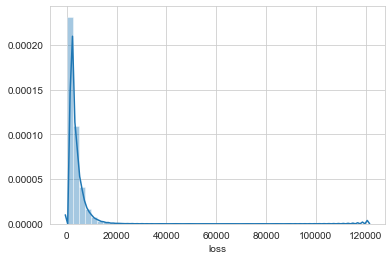

In [3]:
## We plot our label column and see that the data is highly skewed. 
## Most of the machine learning algorithms assume normal distrbution.
## There are multiple ways to do this. One of the way is to take log.

sns.distplot(train['loss'])

In [4]:
## Lets us see how the log of our data looks like

y = np.log1p(train['loss'])

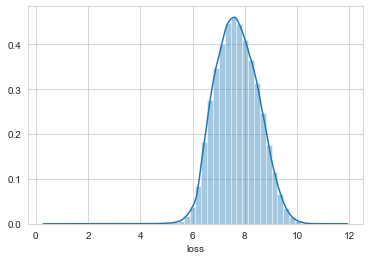

In [5]:
## We see that after taking the log, the data looks like a normal distribution.

sns.distplot(y)

In [6]:
## We remove our label column that we saved in y. 

train.drop('loss',axis = 1, inplace = True)
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,A,B,A,B,A,A,A,A,B,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,A,B,A,A,A,A,A,A,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,A,B,A,A,B,A,A,A,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,B,B,A,B,A,A,A,A,B,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,A,B,A,B,A,A,A,A,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [7]:
## We merge our train and test data

data = pd.concat([train, test]).drop('id', axis = 1)

In [8]:
## We now check for categorical columns that have more that 10 categories.
## We need to deal with high cardinality as onehot encoding will lead to a lot of features.
## This would lead to the curse of dimensionality. 

for x in data.columns[data.dtypes == 'object']:
    if data[x].nunique() > 10:
        print(x)
        print(data[x].nunique())
    else:
        next

cat99
17
cat100
15
cat101
19
cat103
14
cat104
17
cat105
20
cat106
18
cat107
20
cat108
11
cat109
85
cat110
134
cat111
17
cat112
51
cat113
63
cat114
19
cat115
23
cat116
349


In [9]:
## Now we are going to deal with all these columns one by one. We check the counts of each category in cat99 variable.

data.groupby('cat99').count()['cat1'].sort_values(ascending = False)

cat99
P    132100
T    121619
R     17045
D     14583
S     11714
N      4771
K      4533
F      4450
E      1756
C       542
J       416
H       158
M        79
I        64
G        29
O         4
U         1
Name: cat1, dtype: int64

In [10]:
## We add all the categories with counts less than 10k into a new category named other. 
## We now have only 6 categories in cat99.

ind = data.groupby('cat99').count()['cat1'].sort_values(ascending = False)[:5].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat99'] = data['cat99'].apply(lambda x: fn(x))

In [11]:
## similarly for cat100

data.groupby('cat100').count()['cat1'].sort_values(ascending = False)

cat100
F    71817
I    66619
L    33238
K    22852
G    21574
J    19996
H    17797
A    15710
N    12703
B    10954
O     9544
M     8748
C     1345
D      918
E       49
Name: cat1, dtype: int64

In [12]:
ind = data.groupby('cat100').count()['cat1'].sort_values(ascending = False)[:12].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat100'] = data['cat100'].apply(lambda x: fn(x))

In [13]:
## for cat101

data.groupby('cat101').count()['cat1'].sort_values(ascending = False)

cat101
A    177924
D     28819
C     28215
G     18183
F     17021
J     12092
I     11080
M      6084
L      5233
Q      4543
O      4134
S       279
R       234
E         8
B         7
K         3
H         3
N         1
U         1
Name: cat1, dtype: int64

In [14]:
ind = data.groupby('cat101').count()['cat1'].sort_values(ascending = False)[:7].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat101'] = data['cat101'].apply(lambda x: fn(x))

In [15]:
## for cat103

data.groupby('cat103').count()['cat1'].sort_values(ascending = False)

cat103
A    206019
B     55494
C     27792
D     12986
E      7535
F      2506
G       904
H       330
I       167
J        78
L        26
K        23
N         3
M         1
Name: cat1, dtype: int64

In [16]:
ind = data.groupby('cat103').count()['cat1'].sort_values(ascending = False)[:4].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat103'] = data['cat103'].apply(lambda x: fn(x))

In [17]:
## for cat104

data.groupby('cat104').count()['cat1'].sort_values(ascending = False)

cat104
E    71557
G    67626
D    45861
F    32069
H    28462
K    24231
I    18346
C    11581
L     5763
J     5225
M     1914
O      665
N      250
P      136
A      105
B       69
Q        4
Name: cat1, dtype: int64

In [18]:
ind = data.groupby('cat104').count()['cat1'].sort_values(ascending = False)[:8].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat104'] = data['cat104'].apply(lambda x: fn(x))

In [19]:
## for cat105

data.groupby('cat105').count()['cat1'].sort_values(ascending = False)

cat105
E    127477
F    104812
G     34295
D     20345
H     18763
I      4867
J      1193
K       842
C       449
M       290
L       248
A       127
N        93
P        28
O        18
B         6
Q         5
T         3
R         2
S         1
Name: cat1, dtype: int64

In [20]:
ind = data.groupby('cat105').count()['cat1'].sort_values(ascending = False)[:5].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat105'] = data['cat105'].apply(lambda x: fn(x))

In [21]:
## for cat106

data.groupby('cat106').count()['cat1'].sort_values(ascending = False)

cat106
G    78180
H    62597
F    60520
I    35874
J    30373
E    21871
K    13535
L     4872
D     3202
M     1971
N      380
C      204
A      116
O       96
R       55
B       14
P        3
Q        1
Name: cat1, dtype: int64

In [22]:
ind = data.groupby('cat106').count()['cat1'].sort_values(ascending = False)[:7].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat106'] = data['cat106'].apply(lambda x: fn(x))

In [23]:
## for cat107

data.groupby('cat107').count()['cat1'].sort_values(ascending = False)

cat107
F    78863
G    47225
H    39144
J    37430
K    33908
I    33409
E    20691
L    11849
D     5388
M     3456
N     1330
C      340
Q      254
O      223
P      166
A      116
U       55
R       10
B        4
S        3
Name: cat1, dtype: int64

In [24]:
ind = data.groupby('cat107').count()['cat1'].sort_values(ascending = False)[:8].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat107'] = data['cat107'].apply(lambda x: fn(x))

In [25]:
## for cat108

data.groupby('cat108').count()['cat1'].sort_values(ascending = False)

cat108
B    108731
K     71158
G     35899
D     31948
F     16971
A     15417
E     13260
I     12070
H      7180
C       884
J       346
Name: cat1, dtype: int64

In [26]:
ind = data.groupby('cat108').count()['cat1'].sort_values(ascending = False)[:8].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat108'] = data['cat108'].apply(lambda x: fn(x))

In [27]:
## for cat111

data.groupby('cat111').count()['cat1'].sort_values(ascending = False)[:10]

cat111
A    214421
C     53724
E     24475
G     11599
I      6051
K      2177
M       784
O       348
Q       141
S        68
Name: cat1, dtype: int64

In [28]:
ind = data.groupby('cat111').count()['cat1'].sort_values(ascending = False)[:4].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat111'] = data['cat111'].apply(lambda x: fn(x))

In [29]:
## for cat114

data.groupby('cat114').count()['cat1'].sort_values(ascending = False)[:10]

cat114
A    219707
C     27746
E     27469
J     13570
F     13439
N      4097
I      4012
R      1457
L      1426
U       398
Name: cat1, dtype: int64

In [30]:
ind = data.groupby('cat114').count()['cat1'].sort_values(ascending = False)[:5].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat114'] = data['cat114'].apply(lambda x: fn(x))

In [31]:
## for cat115

data.groupby('cat115').count()['cat1'].sort_values(ascending = False)[:10]

cat115
K    73027
O    44746
J    39626
N    37422
P    36368
L    26643
M    20720
Q    13724
I    11721
H     4696
Name: cat1, dtype: int64

In [32]:
ind = data.groupby('cat115').count()['cat1'].sort_values(ascending = False)[:9].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat115'] = data['cat115'].apply(lambda x: fn(x))

In [33]:
## for cat109

data.groupby('cat109').count()['cat1'].sort_values(ascending = False)[:10]

cat109
BI    255052
AB     36289
BU      5316
K       4956
G       2264
BQ      1788
N        763
M        739
BO       549
BH       421
Name: cat1, dtype: int64

In [34]:
def fn(x):
    if x == 'BI':
        return('BI')
    elif x == 'AB':
        return('AB')
    else: return('Other')
data['cat109'] = data['cat109'].apply(lambda x: fn(x))

In [35]:
## for cat110

data.groupby('cat110').count()['cat1'].sort_values(ascending = False)[:10]

cat110
CL    42097
CS    40996
EG    40885
EB    35965
CO    29216
BT    27267
EL    15203
BC     6857
DW     6005
CQ     5437
Name: cat1, dtype: int64

In [36]:
ind = data.groupby('cat110').count()['cat1'].sort_values(ascending = False)[:7].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat110'] = data['cat110'].apply(lambda x: fn(x))

In [37]:
## for cat112

data.groupby('cat112').count()['cat1'].sort_values(ascending = False)[:20]

cat112
E     42109
AH    31149
AS    29310
J     27074
AF    15498
AN    15320
N     13924
U     13901
AV    11968
AK    11069
K     10124
AI     7977
S      7107
AP     6618
G      5268
F      5226
AW     5177
A      4059
AR     3921
C      3745
Name: cat1, dtype: int64

In [38]:
ind = data.groupby('cat112').count()['cat1'].sort_values(ascending = False)[:11].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat112'] = data['cat112'].apply(lambda x: fn(x))

In [39]:
## for cat113

data.groupby('cat113').count()['cat1'].sort_values(ascending = False)[:10]

cat113
BM    43756
AE    36915
L     21838
AX    21054
Y     19146
K     12785
X     11670
S     11645
AF    10043
AN     8701
Name: cat1, dtype: int64

In [40]:
ind = data.groupby('cat113').count()['cat1'].sort_values(ascending = False)[:9].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat113'] = data['cat113'].apply(lambda x: fn(x))

In [41]:
## for cat116

data.groupby('cat116').count()['cat1'].sort_values(ascending = False)[:10]

cat116
HK    35076
DJ    33974
CK    16847
DP    15387
GS    14649
CR    11411
HX     9301
DC     7543
HG     7361
IE     7111
Name: cat1, dtype: int64

In [42]:
ind = data.groupby('cat116').count()['cat1'].sort_values(ascending = False)[:7].index
def fn(x):
    if x in ind:
        return(x)
    else: return('Other')
data['cat116'] = data['cat116'].apply(lambda x: fn(x))

In [43]:
## Now we import the standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
## And scale all the numeric values to match standard normal distribution

num =  data.dtypes[data.dtypes == 'float64'].index
scaler.fit(data[num])
data[num] = scaler.transform(data[num])

In [45]:
## We one hot encode our data and remove the first column to remove multi-collinearity

data = pd.get_dummies(data, drop_first=True)

In [46]:
## Now we define our features x and test data

x = data[:len(train)]
test = data[len(train):]

In [51]:
## Now we begin to import all the regression libraries. We choose to apply regression manually here.

In [52]:
## We can now train various machine learning models. We see that 

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
n_folds = 5
from sklearn.model_selection import cross_val_score
print(np.sqrt(-cross_val_score(LR, x, y, scoring= "neg_mean_squared_error", cv = n_folds)).mean())

425429064.49669945


In [ ]:
# import xgboost as xgb

In [ ]:
# xgb = xgb.XGBRegressor()
# n_folds = 5
# from sklearn.model_selection import cross_val_score
# print(np.sqrt(-cross_val_score(xgb, x, y, scoring= "neg_mean_squared_error", cv = n_folds)).mean())

In [ ]:
#model = xgb.fit(x,y)

In [ ]:
#pred = model.predict(test)

In [ ]:
#pred2 = np.expm1(pred)

In [ ]:
#submission.to_csv('sub_v.csv', index=False)